<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/master/Auto_encoder_with_1D_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#first to mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np

In [5]:
APB1 = pd.read_csv("/content/drive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_ABP_signals_10_beats_Aug_2022.csv")
PPG1 = pd.read_csv("/content/drive/MyDrive/data/peak2peak_aug_2022/Part_1/10_beat_signals/part_1_PPG_signals_10_beats_Aug_2022.csv")

PPG2 = pd.read_csv("/content/drive/MyDrive/data/peak2peak_aug_2022/Part_2/10_beat_signals/part_2_PPG_signals_10_beats_Aug_2022.csv")
APB2= pd.read_csv("/content/drive/MyDrive/data/peak2peak_aug_2022/Part_2/10_beat_signals/part_2_ABP_signals_10_beats_Aug_2022.csv")

In [6]:
PPG = pd.concat([PPG1 , PPG2])


In [7]:
APB = pd.concat([APB1 , APB2])

In [8]:
PPG.shape,PPG1.shape,PPG2.shape

((30906, 1024), (15453, 1024), (15453, 1024))

In [4]:
PPG.shape

(15453, 1024)

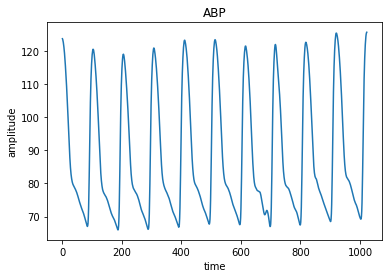

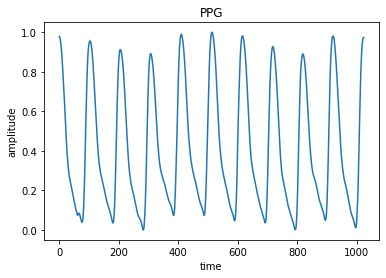

In [11]:
plt.plot(APB.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("ABP");

plt.figure();
plt.plot(PPG.iloc[0,:].values);
plt.xlabel('time');
plt.ylabel('amplitude');
plt.title("PPG");

In [23]:
X = PPG.values
input_shape = (X.shape[0],1024,1)
X = np.reshape(X,input_shape)
print("input shape is ",X.shape)
y= APB.values
input_shape = (y.shape[0],1024,1)
y = np.reshape(y,input_shape)
print("output shape is ",y.shape)

input shape is  (30906, 1024, 1)
output shape is  (30906, 1024, 1)


In [24]:
def normalizer(arr):
  for i in range(arr.shape[0]):
    arr[i,:,:] = arr[i,:,:]/max(arr[i,:,:])
  return arr
y = normalizer(y)

In [26]:
y[100,:,:].max()

1.0

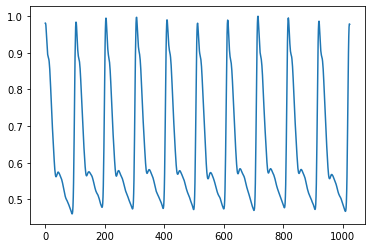

In [27]:
plt.plot(y[100,:,:])

In [28]:
X_train,X_test , y_train  , y_test = train_test_split(X , y , test_size = 0.11,shuffle=True)
print("train shape is ",X_train.shape)
print("test shape is ",X_test.shape)

train shape is  (27506, 1024, 1)
test shape is  (3400, 1024, 1)


In [29]:
model = Sequential()
model.add(Conv1D(256, 5, activation='relu', padding='same', input_shape=input_shape[1:]))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(32,3, activation='relu', padding='same')) 

model.add(MaxPooling1D(2, padding='same'))

model.add(Conv1D(32, 3, activation='relu', padding='same'))
model.add(UpSampling1D(2))     
model.add(Conv1D(64, 3, activation='relu', padding='same'))
model.add(UpSampling1D(2))
model.add(Conv1D(128, 5, activation='relu', padding='same'))
model.add(UpSampling1D(2))
model.add(Conv1D(256, 5, activation='relu', padding='same'))
model.add(UpSampling1D( 2))
model.add(Conv1D(1, 5, activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 1024, 256)         1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 512, 256)         0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 512, 128)          163968    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 256, 128)         0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 256, 64)           24640     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 128, 64)         

In [30]:
callbacks = [
            keras.callbacks.TensorBoard(
            log_dir='my_log_dir',
            histogram_freq=1,
            embeddings_freq=1,
            ),
             ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/autoencoder',
                             save_best_only=True),
             keras.callbacks.EarlyStopping(
                                      monitor="val_loss",
                                      min_delta= 0,
                                      patience= 5,
                                      verbose= 0,
                                      mode="auto",
                                      baseline=None,
                                      restore_best_weights=True,
)
]

In [40]:
model.fit( X_train , y_train , epochs=20 , batch_size = 64 ,validation_split = 0.2,callbacks = callbacks)           

Epoch 1/20
344/344 [==============================] - 535s 2s/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2/20
344/344 [==============================] - 535s 2s/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 3/20
344/344 [==============================] - 530s 2s/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 4/20
344/344 [==============================] - 519s 2s/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 5/20
344/344 [==============================] - 533s 2s/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 6/20
344/344 [==============================] - 530s 2s/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 7/20
344/344 [==============================] - 534s 2s/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 8/20
344/344 [==============================] - 532s 2s/step - 

In [41]:
model.evaluate(X_test , y_test)

107/107 [==============================] - 22s 203ms/step - loss: 0.0045 - mse: 0.0045


[0.0045232889242470264, 0.0045232889242470264]

In [42]:
print("Output")
pred = model.predict(X_test)   #Predict model on the same input array.

Output


In [43]:
X_test.shape,pred.shape

((3400, 1024, 1), (3400, 1024, 1))

In [2]:
i = np.random.randint(0,1932,1)[0]
"""print('index is ',i)
plt.plot(X_test[i,:,0])
plt.title("Input value")"""

"""plt.figure()
plt.plot(pred[i,:,0],label = 'predicted')
plt.legend()
plt.title("Predicted")
"""
"""plt.figure()
plt.plot(y_test[i,:,0],label = 'true')
plt.title("True ECG ")
plt.legend()"""

plt.figure()
plt.plot(y_test[i,:,0],label = 'true')
plt.plot(pred[i,:,0],label = 'predicted')
plt.title("True ECG vs predicted ECG ")
plt.legend()




NameError: ignored

In [233]:
model.save('/content/drive/MyDrive/Colab Notebooks/autoencoder/PPG_ECG_autoencoder_1024_10beats_part1_part2.h5')

index is  1672


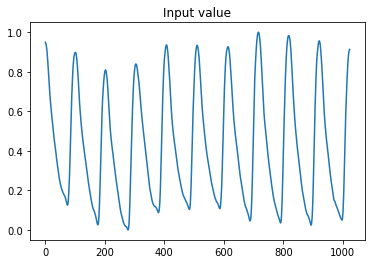

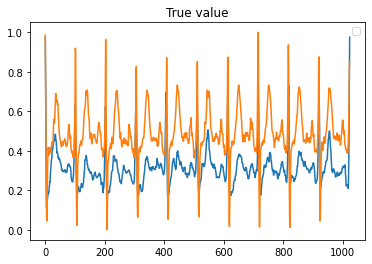

In [67]:
i = np.random.randint(0,1932,1)[0]
print('index is ',i)
plt.plot(X_test[i,:,0])
plt.title("Input value")

plt.figure()
plt.plot(pred[i,:,0])
plt.title("Predicted")
#plt.figure()
plt.plot(y_test[i,:,0])
plt.title("True value")
plt.legend()

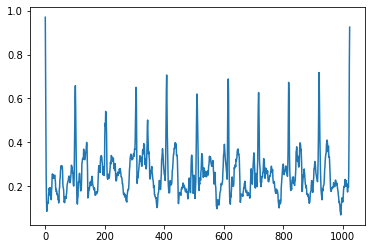

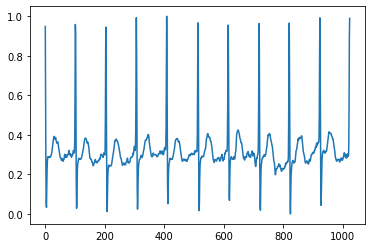

In [32]:
plt.plot(pred[0,:,0])
plt.figure()
plt.plot(y_test[0,:,0])

(1024, 1)

(1024, 8, 1)

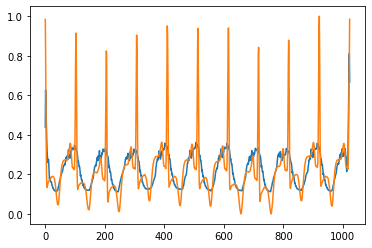

In [45]:
plt.plot(pred[0,:,0])
plt.plot(y[0,:,0])

In [32]:
pred.shape

(1, 1024, 1)